In [1]:
#%pip install lightgbm

#https://lightgbm.readthedocs.io/en/v3.3.2/
import lightgbm as lgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


X_train= pd.read_csv("../train-test/X_train_large.csv")
X_test= pd.read_csv("../train-test/X_test_large.csv")
y_train= pd.read_csv("../train-test/y_train.csv")
y_test= pd.read_csv("../train-test/y_test.csv")
X_train.shape

(2051, 138)

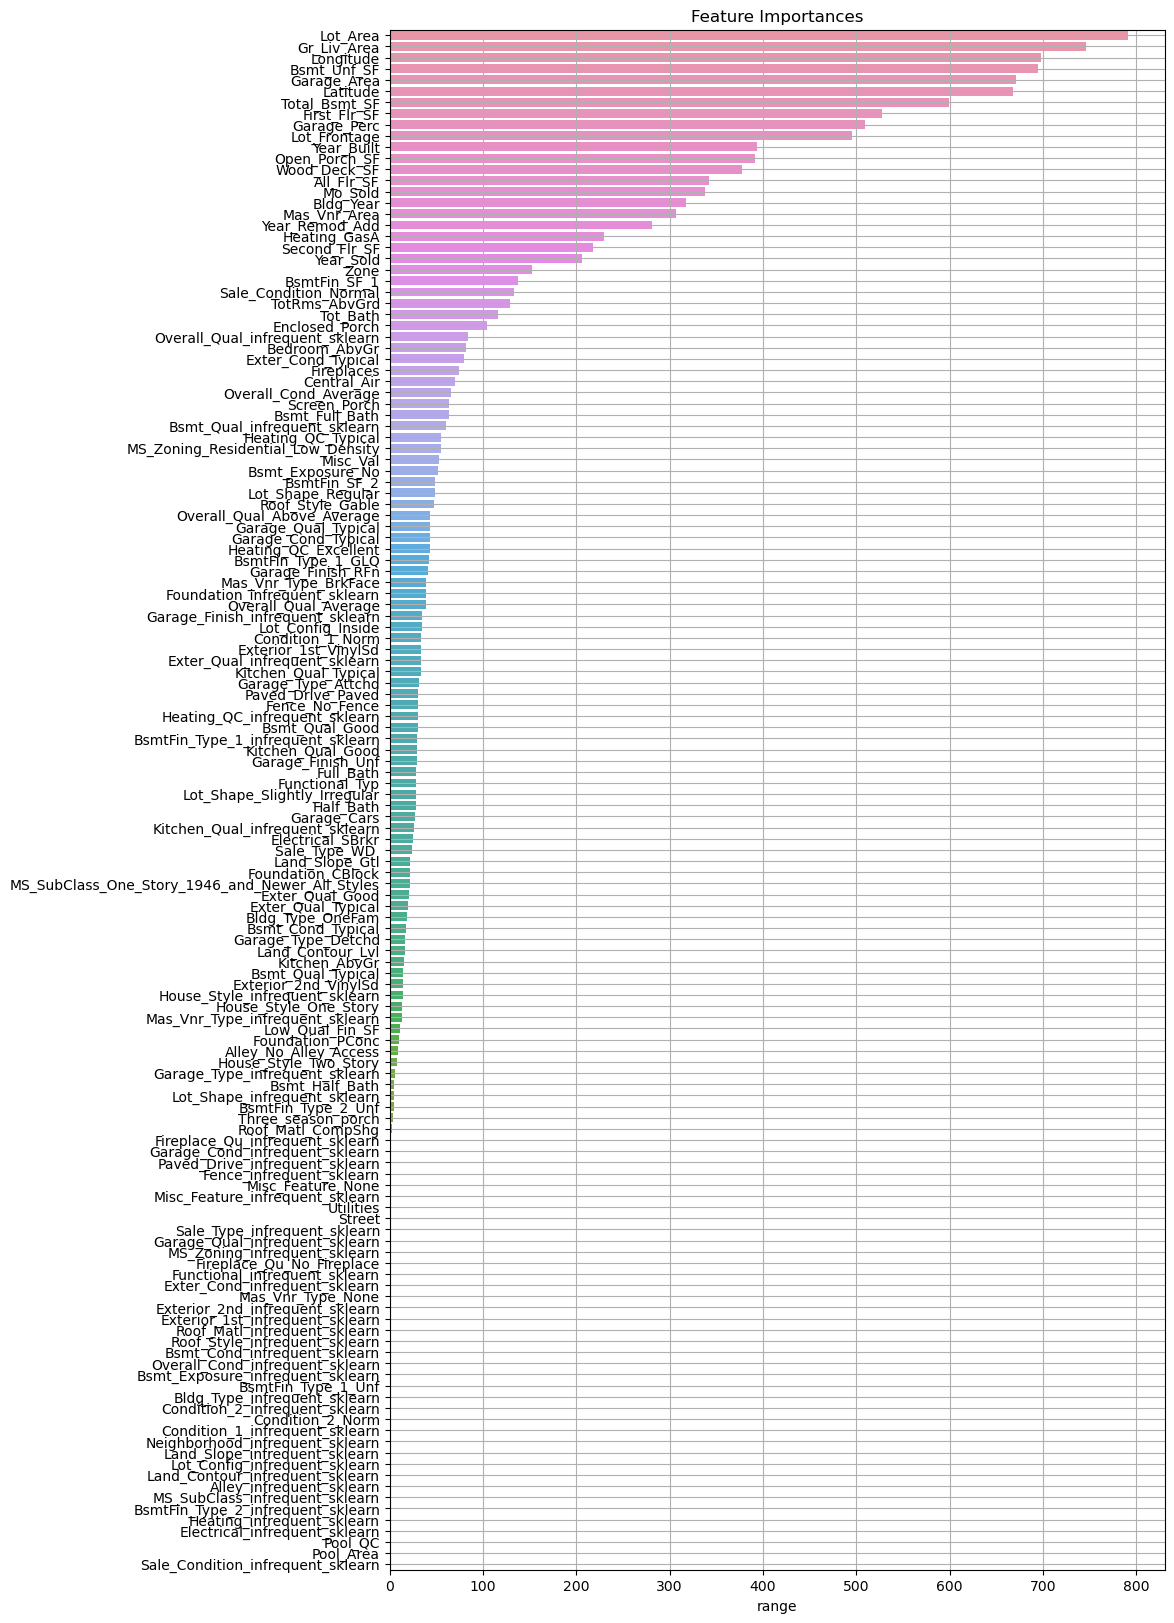

In [2]:

import seaborn as sns
X = X_train
y = y_train
l = lgb.LGBMRegressor(n_estimators=431, n_jobs=-1)
l.fit(X,y)
d= {}
for i in range(0,X.shape[1]):
    d[X.columns[i]] = l.feature_importances_[i]
fig, ax = plt.subplots(figsize=(10,20))
#ax.barh(range(0,X.shape[1]),rf.feature_importances_)
feature_importance= pd.DataFrame({"range": l.feature_importances_,
                   "feature": X.columns })

sns.barplot(x='range',
            y=X.columns, data=feature_importance,
            order=feature_importance.sort_values('range').feature)
ax.set_title("Feature Importances")
#ax.set_yticklabels(X.columns )
#ax.set_yticks(range(0,X.shape[1]))
ax.invert_yaxis() 
ax.grid()

In [3]:
'''a= pd.DataFrame(sorted(d.items(), key=lambda x:x[1],reverse=True))
for key, value in d.items():
    if value < a.quantile(.70, axis = 0)[1]:
        X_train = X_train.drop(columns=key)
        X_test = X_test.drop(columns=key)
'''

'a= pd.DataFrame(sorted(d.items(), key=lambda x:x[1],reverse=True))\nfor key, value in d.items():\n    if value < a.quantile(.70, axis = 0)[1]:\n        X_train = X_train.drop(columns=key)\n        X_test = X_test.drop(columns=key)\n'

In [4]:
import lightgbm as lgb


light =  lgb.LGBMRegressor(n_estimators=431, n_jobs=-1)
light.fit(X_train,y_train)
acc = light.score(y=y_test, X=X_test)
print(f'max acc:{acc}')




max acc:0.9112791651932882


In [5]:
from sklearn.model_selection import RandomizedSearchCV

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node

parameters = {'n_estimators': range(2,2000,20),
               'num_leaves': range(2,1500,20),
               'min_data_in_leaf': range(1,2000,20),
               'max_depth': range(2,2000,100)}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
light =  lgb.LGBMRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
light_random = RandomizedSearchCV(estimator = light, param_distributions = parameters, n_iter = 2000, cv = 3, verbose=2,error_score='raise',  n_jobs = -1)
# Fit the random search model
light_random.fit(X_train, y_train)
params= light_random.best_params_
params

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21


{'num_leaves': 22,
 'n_estimators': 602,
 'min_data_in_leaf': 21,
 'max_depth': 902}

In [6]:
params['n_estimators']

602

In [7]:
light =  lgb.LGBMRegressor(n_estimators= params['n_estimators'],
                            num_leaves= params['num_leaves'],
                            min_data_in_leaf = params['min_data_in_leaf'],
                            min_child_samples= None,
                            max_depth= params['max_depth'],
                            n_jobs=-1)
light.fit(X_train,y_train)
acc = light.score(y=y_test, X=X_test)
print(f'max acc:{acc}')


max acc:0.9074484690487673


In [8]:
#salvare i modelli di regressioni in .sav così da non doverli eseguire più volte

from ipynb.fs.defs.data_analysis import save_regressor
save_regressor(light)

In [9]:
#%pip install ipynb


from ipynb.fs.defs.data_analysis import model_analysis 
data = model_analysis(light)


enter
                       Score      Variance           MSE
name                                                    
DecisionTreeRegressor  0.811  5.944220e+09  1.259977e+09
KNeighborsRegressor    0.817  5.671486e+09  1.402773e+09
LGBMRegressor          0.890  5.877599e+09  7.829204e+08
LinearRegression       0.846  5.482299e+09  1.372148e+09
RandomForestRegressor  0.891  5.651420e+09  8.100146e+08
                       Score      Variance           MSE
name                                                    
DecisionTreeRegressor  0.800  5.781312e+09  1.412329e+09
KNeighborsRegressor    0.291  4.999458e+09  4.721170e+09
LGBMRegressor          0.902  5.800592e+09  6.866333e+08
LinearRegression       0.846  5.481269e+09  1.456500e+09
RandomForestRegressor  0.902  5.527662e+09  7.257831e+08
                       Score      Variance           MSE
name                                                    
DecisionTreeRegressor  0.796  5.791097e+09  1.416795e+09
KNeighborsRegressor    0.